Count Vectorization and Naive Bayes Model

Naive Bayes classifier makes decisions by comparing two probabilites(the chances of an event). In other words, in our project the model comparing the chances of being fake or real of the article. If the probability of the article being fake is higher than being real, the model will classify it to be fake.

For text classification, we have to find some way to describe chunks of data that points to the labeled data as fake and real for the machine learning model. These descriptions are called as features. We will use the texts of the articles, so the feature would be described as the count of the most frequent words. 

The text is prepared with removal of punctuations, no whitespaces, no stopwords, no special characters and lemmatization was also performed. Then, we will use supervised machine learning model. We can train a classifier by showing it all of the features of all the words, and let it try to figure out the more meaningful differences between a fake article and a real one, by simply looking for common frequent words. 

We will test it out to see how accurate it is with the most common words. Then, we will check whether accuracy and learning is correct, or whether we underfitted or overfitted the model. Then, we have to make it more balanced. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random 
import re

#scikit: vectorization, ML and analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.feature_extraction import text


In [2]:
df = pd.read_csv('cleaned_news.csv')

In [3]:
df.shape

(38590, 2)

In [4]:
df.describe

<bound method NDFrame.describe of                                                     text  true
0      donald trump just couldn t wish all americans ...     0
1      house intelligence committee chairman devin nu...     0
2      on friday it was revealed that former milwauke...     0
3      on christmas day donald trump announced that h...     0
4      pope francis used his annual christmas day mes...     0
...                                                  ...   ...
38585  nato allies on tuesday welcomed president dona...     1
38586  lexisnexis a provider of legal regulatory and ...     1
38587  in the shadow of disused sovietera factories i...     1
38588  vatican secretary of state cardinal pietro par...     1
38589  indonesia will buy  sukhoi fighter jets worth ...     1

[38590 rows x 2 columns]>

In [5]:
df.head()

,text,true
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauke...,0
3,on christmas day donald trump announced that h...,0
4,pope francis used his annual christmas day mes...,0


In [6]:
df_x=df["text"]
df_y=df["true"]

In [7]:
cv = CountVectorizer()

In [8]:
#we have to convert each word of text column into binary numbers
#we test it in small before applying solution to the whole dataset

In [9]:
#splitting the test and train data first for the test

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [10]:
x_traincv = cv.fit_transform(["Hello How are you How are you doing","Hi what's up","I cannot believe that"])

In [11]:
x_traincv.toarray()

#we gave examples as a form of list above, and it converted the items of the list into binary as below
# the numbers represents the count of the word within the list item 

array([[2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [12]:
cv.get_feature_names()
# this method gives us the words. If we compare it to the array above, we can see that 'are' is counted twice in the 
#first item, believe is counted 0, cannot is not there either...etc.

c:\users\janka\pycharmprojects\dataspec\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['are',
 'believe',
 'cannot',
 'doing',
 'hello',
 'hi',
 'how',
 'that',
 'up',
 'what',
 'you']

In [13]:
vectorizer = CountVectorizer(stop_words='english')

# Used stop_words parameter to remove additional ones that nltk in data cleaning did not remove
# converts text to binary data

In [14]:
all_words = vectorizer.fit_transform(df.text.values.astype('U')) #needed to convert data to unicode

In [15]:
all_words.shape   
#we receive a sparce matrix
#the columns represent the tokens of our text

(38590, 207937)

In [16]:
vectorizer.vocabulary_
#we can see the tokens by the count, one by one 

{'donald': 50350,
 'trump': 188764,
 'just': 93177,
 'couldn': 38960,
 'wish': 202964,
 'americans': 7220,
 'happy': 75602,
 'new': 118738,
 'year': 205672,
 'leave': 99446,
 'instead': 86776,
 'shout': 166798,
 'enemies': 55786,
 'haters': 76294,
 'dishonest': 48813,
 'fake': 60574,
 'news': 118822,
 'media': 108775,
 'reality': 149472,
 'star': 173234,
 'job': 91823,
 'country': 39257,
 'rapidly': 148678,
 'grows': 73128,
 'stronger': 175805,
 'smarter': 169494,
 'want': 198553,
 'friends': 66954,
 'supporters': 177499,
 'healthy': 76902,
 'president': 142626,
 'angry': 8119,
 'pants': 129266,
 'tweeted': 190361,
 'great': 72407,
 'america': 7047,
 'realdonaldtrump': 149423,
 'december': 44371,
 'tweet': 190333,
 'went': 201078,
 'welll': 200835,
 'expectwhat': 59056,
 'kind': 95418,
 'sends': 164195,
 'greeting': 72583,
 'like': 101309,
 'despicable': 46692,
 'petty': 132605,
 'infantile': 85705,
 'gibberish': 69888,
 'lack': 97424,
 'decency': 44387,
 'won': 203547,
 'allow': 5845,

In [17]:
x_train.shape #have to run the test-train-split again

(30872,)

In [18]:
label=df["true"]  #renaming for better readability

In [19]:
x_train, x_test, y_train, y_test = train_test_split(all_words, label, test_size=0.2, random_state=75)

In [20]:
x_train.shape 

(30872, 207937)

In [21]:
x_test.shape

(7718, 207937)

In [22]:
classifier = MultinomialNB() #creating the Naive Bayes Model

In [23]:
classifier.fit(x_train, y_train) #training the model with our CV-d text data and labels

MultinomialNB()

In [24]:
# I want the number of tokens labeled correctly, the number of tokens labeled incorrectly and the accuracy of the model

correct = (y_test == classifier.predict(x_test)).sum()

In [25]:
print(f'{correct} samples classified correctly.')

7361 samples classified correctly.


In [26]:
incorrect = y_test.size - correct

In [27]:
print(f'Samples classified incorrectly: {incorrect}.')

Samples classified incorrectly: 357.


In [28]:
accuracy = incorrect / (incorrect + correct)

In [29]:
print(f'The accuracy of the Naive Bayes model is: {1-accuracy:.2%}.') #.2% converts the result into percentage

The accuracy of the Naive Bayes model is: 95.37%.


In [30]:
#there is a method of scikit to calculate accuracy

In [31]:
classifier.score(x_test, y_test)

0.9537444933920705

The confusion matrix is another metric to measure the performance of a classification algorithm.
The predicted binary classes are demonstrated in the columns of the matrix. 
The actual classes are in the rows of the matrix. 

True positives (TP): the cases for which the classifier predicted ‘real’ and the articles were actually real.
True negatives (TN): the cases for which the classifier predicted ‘fake’ and the articles were actually fake.
False positives (FP): the cases for which the classifier predicted ‘real’ but the articles were actually fake.
False negatives (FN): the cases for which the classifier predicted ‘fake’ but the articles were actually real.

In other words:
true prediction = correct prediction
false prediction = incorrect prediction
positive/negative = prediction of the expected class (positive = fake, negative = true)

In [32]:
cm = confusion_matrix(y_test, classifier.predict(x_test))
print(cm)

#from the two arrays we get the number for TN, TP, FN, FP
# first array(0=fake) TN, FP
# second array(1=real) FN, TP

# [[TN, FP]]
# [[FN, TP]]

[[3248  172]
 [ 185 4113]]


In [33]:
TN = 4113
TP = 3248
FN = 172
FP = 185

accuracy_NB = (TP+TN) / (TP+TN+FP+FN)
print(f'Out of the {TN+FP} actual fake articles, the model predicted incorrectly {FP} articles as real, and it predicted {TN} correctly as fake.')
print(f'Out of the {FN+TP} actual real articles, the model predicted correctly {TP} articles as real, and {FN} times incorrectly.')

Out of the 4298 actual fake articles, the model predicted incorrectly 185 articles as real, and it predicted 4113 correctly as fake.
Out of the 3420 actual real articles, the model predicted correctly 3248 articles as real, and 172 times incorrectly.


Out of the 4298 actual fake articles, the model predicted incorrectly 185 articles as real, and it predicted 4113 correctly as fake.
Out of the 3420 actual real articles, the model predicted correctly 3248 articles as real, and 172 times incorrectly.


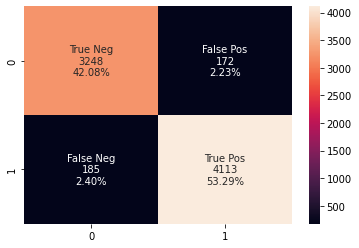

In [34]:
# visualization of the confusion matrix

sns.set_palette(palette='flare')

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="")

print(f'Out of the {TN+FP} actual fake articles, the model predicted incorrectly {FP} articles as real, and it predicted {TN} correctly as fake.')
print(f'Out of the {FN+TP} actual real articles, the model predicted correctly {TP} articles as real, and {FN} times incorrectly.')

Precision, recall and f1-score(there are methods for all in scikit library)

Precision: it is the number of cases when the model predicts positive results.
This is obtained by calculating: TP / (TP+FP)
Precision is usually used when the goal is to limit the number of false positives (FP).

Recall:  it is the number of cases when the model predicts the positive results out of positive cases.
This is obtained by calculating: TP / (TP+FN)
Also calles as True positive ratio.
The goal is to limit the number of false negatives (FN).

f1-score: the balance of the means of precision and recall:
This is obtained by calculating: 
2 x (precision x recall) / (precision + recall)
It is important for optimization. 

In [35]:
#calculating the recall score

recall_score(y_test, classifier.predict(x_test))


0.9569567240577013

In [36]:
#calculating the precision score

precision_score(y_test, classifier.predict(x_test))

0.9598599766627771

In [37]:
#calculating the f1 score

f1_score(y_test, classifier.predict(x_test))

0.9584061516952115

In [38]:
print(classification_report(y_test, classifier.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3420
           1       0.96      0.96      0.96      4298

    accuracy                           0.95      7718
   macro avg       0.95      0.95      0.95      7718
weighted avg       0.95      0.95      0.95      7718



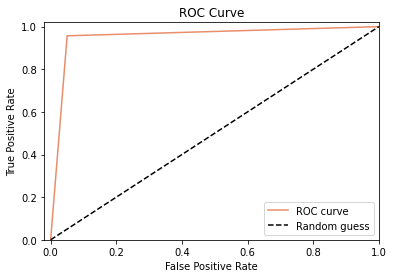

In [39]:
#Plotting the ROC curve 
# It is created by plotting the true positive rate (TPR = recall) against the false positive rate (FPR = FP/(FP+TN)

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict(x_test))
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

The area under the ROC curve is a good measure of the performance of the classification algorithm. If it is near to the random guess line, the classifier is not performing well, whereas it gets better as the area gets close to 1. What we can see is that our classifier is very good at minimizing false negatives (fake which is classified as real) and true negatives (real articles which is classified as fake). We are talking about the area under the whole ROC curve, the result is not related to any particular threshold. So, we cannot really observe which is the best threshold to obtain useful predictions, but it is a good way for demonstrating the accuracy of the model.